In [1]:
%matplotlib inline
import sys
import warnings
import pandas as pd

sys.path.append("../src/")
warnings.filterwarnings('ignore')


In [2]:
from anomalydetection.interactor.anomaly_detection_engine.robust_z_engine import RobustDetector

In [3]:
path = 'data.csv'
df = pd.read_csv(path)

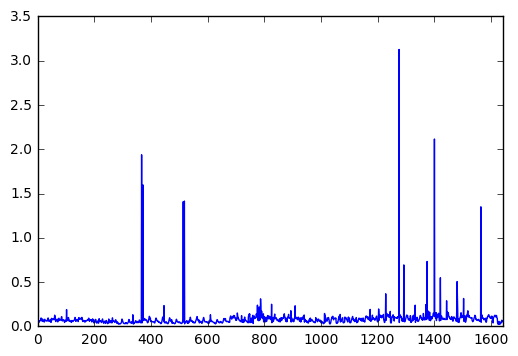

In [4]:
df.value.plot()

In [8]:
detector = RobustDetector(window=50)
df['anomaly_score'] = 0

In [22]:
import numpy as np
import time

In [23]:
%%time
times = np.zeros_like(df.value)
for ix, value in enumerate(df.value):
    now=time.time()
    tmp = detector.predict(value)
    times[ix] = time.time()-now
    df['anomaly_score'].iloc[ix] = tmp

CPU times: user 1min 13s, sys: 21.7 ms, total: 1min 13s
Wall time: 1min 13s


In [33]:
print(round(times.mean()*1e3, 3), 'ms')

0.291 ms


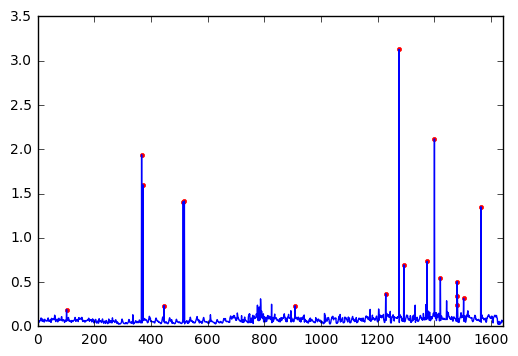

In [24]:
th=1
df[df['anomaly_score'] >= th]['value'].plot(style='r.')
df['value'].plot()